a = 0.9790883956258257 , b = 0.004281129319493785
a = 0.9649801254981568 , b = 8.125720674649421e-17


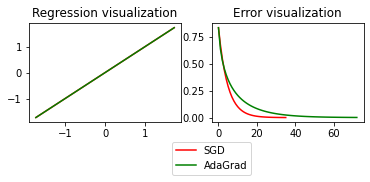

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def h(a,b,x): #hypothesis function
    return a*x+b

def mse(a,b,x,y): #loss function
    return np.mean((h(a,b,x) - y)**2)

def gradient(a,b,x,y): #mse derivatives
    return np.mean(x*(a*x+b-y), axis=-1), np.mean(a*x+b-y, axis=-1)

def generate_data(nb): #generate data with noise
    x = np.array([])
    y = np.array([])
    for i in range(nb):
        x = np.insert(x, len(x), i)
        y = np.insert(y, len(y), i/2 + np.random.rand()*20)
    return x,y

def shuffle(x,y):
    s = np.arange(len(x))
    np.random.shuffle(s)
    return x[s], y[s]

def stochastic_gradient_descent(a,b,x,y,lr=1e-5,epsilon=1e-4):
    prev_error = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a,b,x,y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        prev_error = mse(a,b,x,y)
        error = np.insert(error, len(error), prev_error)

        a -= lr * gradient_a
        b -= lr * gradient_b
    return a, b, error

def adagrad_gradient_descent(a, b, x, y, lr=1e-5, epsilon=1e-4):
    prev_error = 0
    adagrad_a = 0
    adagrad_b = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a, b, x, y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        prev_error = mse(a, b, x, y)
        error = np.insert(error, len(error), prev_error)

        adagrad_a += gradient_a**2
        adagrad_b += gradient_b**2
        a -= (lr / (adagrad_a**0.5 + 1e-8)) * gradient_a
        b -= (lr / (adagrad_b**0.5 + 1e-8)) * gradient_b
    return a, b, error
x, y = generate_data(1000)
# normalization
x -= np.mean(x)
x /= np.std(x)
y -= np.mean(y)
y /= np.std(y)
regression_subplot = plt.subplot(221)
error_subplot = plt.subplot(222)

a_0, b_0 = np.random.rand(), np.random.rand()

'''
vanilla
'''
a, b, error = vanilla_gradient_descent(a_0, b_0, x, y, lr=1e-1)
prediction1 = h(a,b,x)
regression_subplot.plot(x, prediction, color="r", label="SGD")
error_subplot.plot(error, color="r", label="SGD")
print("a =",a,", b =",b)

'''
adagrad
'''
a, b, error = adagrad_gradient_descent(a_0, b_0, x, y, lr=1e-1)
prediction2 = h(a,b,x)
regression_subplot.plot(x, prediction, color="g", label="AdaGrad")
error_subplot.plot(error, color="g", label="AdaGrad")
print("a =",a,", b =",b)
error_subplot.legend(['SGD', 'AdaGrad'], loc=4)


#Set titles
regression_subplot.set_title("Regression visualization")
error_subplot.set_title("Error visualization")
plt.legend(bbox_to_anchor=(0, -0.2), loc=9, borderaxespad=0.)
plt.show()

No handles with labels found to put in legend.


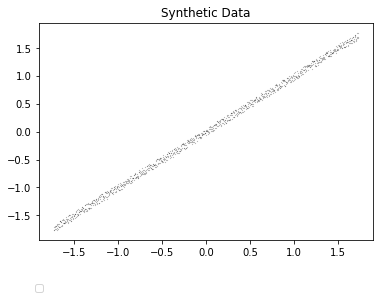

In [26]:
regression_subplot2 = plt.subplot(1,1,1)
regression_subplot2.set_title("Synthetic Data")
regression_subplot2.scatter(x, y, color="black", s=0.01)
plt.legend(bbox_to_anchor=(0, -0.2), loc=9, borderaxespad=0.)
plt.show()